In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [9]:
pd.options.display.max_columns = 99

prof = pd.read_csv("School/Vanderbilt.csv", index_col = 0)
ratings = pd.read_csv("Ratings/school4002.csv", engine='python', index_col = 0) #read review data
ratings = ratings.merge(prof, on="tid")
ratings.head()

,attendance,clarityColor,easyColor,helpColor,helpCount,id,notHelpCount,onlineClass,quality,rClarity,rClass,rComments,rDate,rEasy,rEasyString,rErrorMsg,rHelpful,rInterest,rOverall,rOverallString,rStatus,rTextBookUse,rTimestamp,rWouldTakeAgain,sId,takenForCredit,teacher,teacherGrade,teacherRatingTags,unUsefulGrouping,usefulGrouping,tid,tDept,tSid,institution_name,tFname,tMiddlename,tLname,tNumRatings,rating_class,contentType,categoryType,overall_rating
0,Not Mandatory,good,average,good,0.0,34017641,0.0,NaN,awesome,5,CS2212,Lectures are very clear and easy to understand...,12/10/2020,2.0,2.0,NaN,5,NaN,5.0,5.0,1.0,No,1.607623e+12,Yes,4002.0,Yes,NaN,A,"['Caring', 'EXTRA CREDIT', 'Accessible outside...",people,people,2522286.0,Computer Science,4002,Vanderbilt University,Waseem,NaN,Abbas,19,good,TEACHER,PROFESSOR,4.6
1,Not Mandatory,good,average,good,0.0,34005897,0.0,NaN,awesome,5,CS2212,Professor Waseem was amazing to learn under--b...,12/09/2020,2.0,2.0,NaN,5,NaN,5.0,5.0,1.0,No,1.607552e+12,Yes,4002.0,Yes,NaN,A+,"['Accessible outside class', 'Respected', 'Giv...",people,people,2522286.0,Computer Science,4002,Vanderbilt University,Waseem,NaN,Abbas,19,good,TEACHER,PROFESSOR,4.6
2,Not Mandatory,good,good,good,0.0,33994774,0.0,NaN,awesome,5,CS2212,TAKE DR. ABBAS!!! Best professor I've ever had...,12/09/2020,4.0,4.0,NaN,5,NaN,5.0,5.0,1.0,Yes,1.607486e+12,Yes,4002.0,Yes,NaN,A,"['Caring', 'Amazing lectures', 'Inspirational']",people,people,2522286.0,Computer Science,4002,Vanderbilt University,Waseem,NaN,Abbas,19,good,TEACHER,PROFESSOR,4.6
3,NaN,good,average,good,0.0,33938623,0.0,NaN,awesome,5,CS2212,I was shocked when Dr. Abbas told us that he's...,12/03/2020,3.0,3.0,NaN,5,NaN,5.0,5.0,1.0,Yes,1.607015e+12,Yes,4002.0,Yes,NaN,A-,"['Hilarious', 'Amazing lectures', 'Accessible ...",people,people,2522286.0,Computer Science,4002,Vanderbilt University,Waseem,NaN,Abbas,19,good,TEACHER,PROFESSOR,4.6
4,NaN,good,good,good,0.0,33938459,0.0,NaN,awesome,5,CS2212,"concepts are not too challenging, but you need...",12/03/2020,4.0,4.0,NaN,5,NaN,5.0,5.0,1.0,Yes,1.607014e+12,Yes,4002.0,Yes,NaN,NaN,"['Accessible outside class', 'Caring']",people,people,2522286.0,Computer Science,4002,Vanderbilt University,Waseem,NaN,Abbas,19,good,TEACHER,PROFESSOR,4.6


In [17]:
ratings["rOverall"] = pd.to_numeric(ratings["rOverall"], errors="coerce")
ratings["rDate"] = pd.to_datetime(ratings["rDate"])

In [18]:
print("Number of reviews: ", len(ratings))
print("Number of professors: ", ratings.tid.nunique())
print("Average rating:", ratings["rOverall"].mean())

Number of reviews:  21884
Number of professors:  1740
Average rating: 3.828961798574301


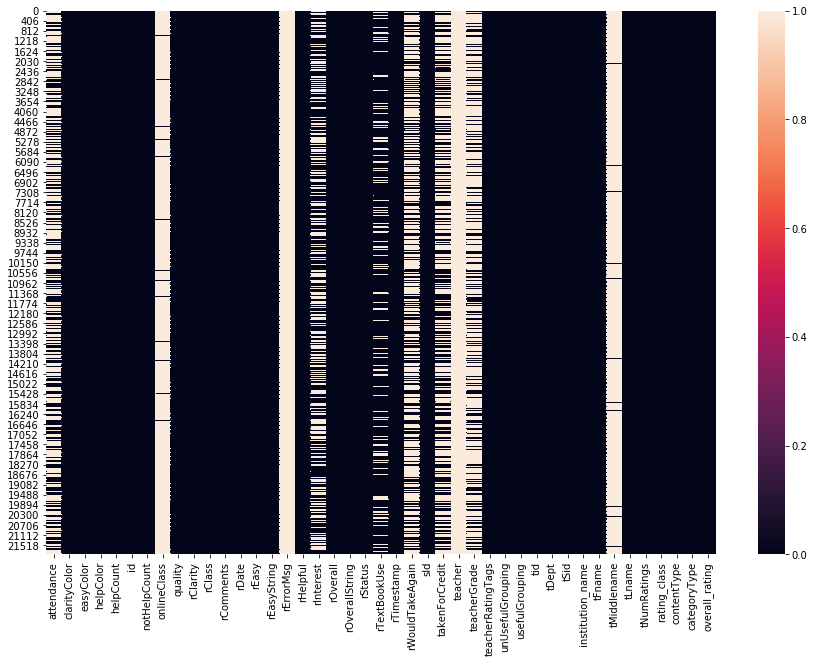

In [19]:
plt.figure(figsize = (15, 10))
sns.heatmap(ratings.isnull())

# Ratings

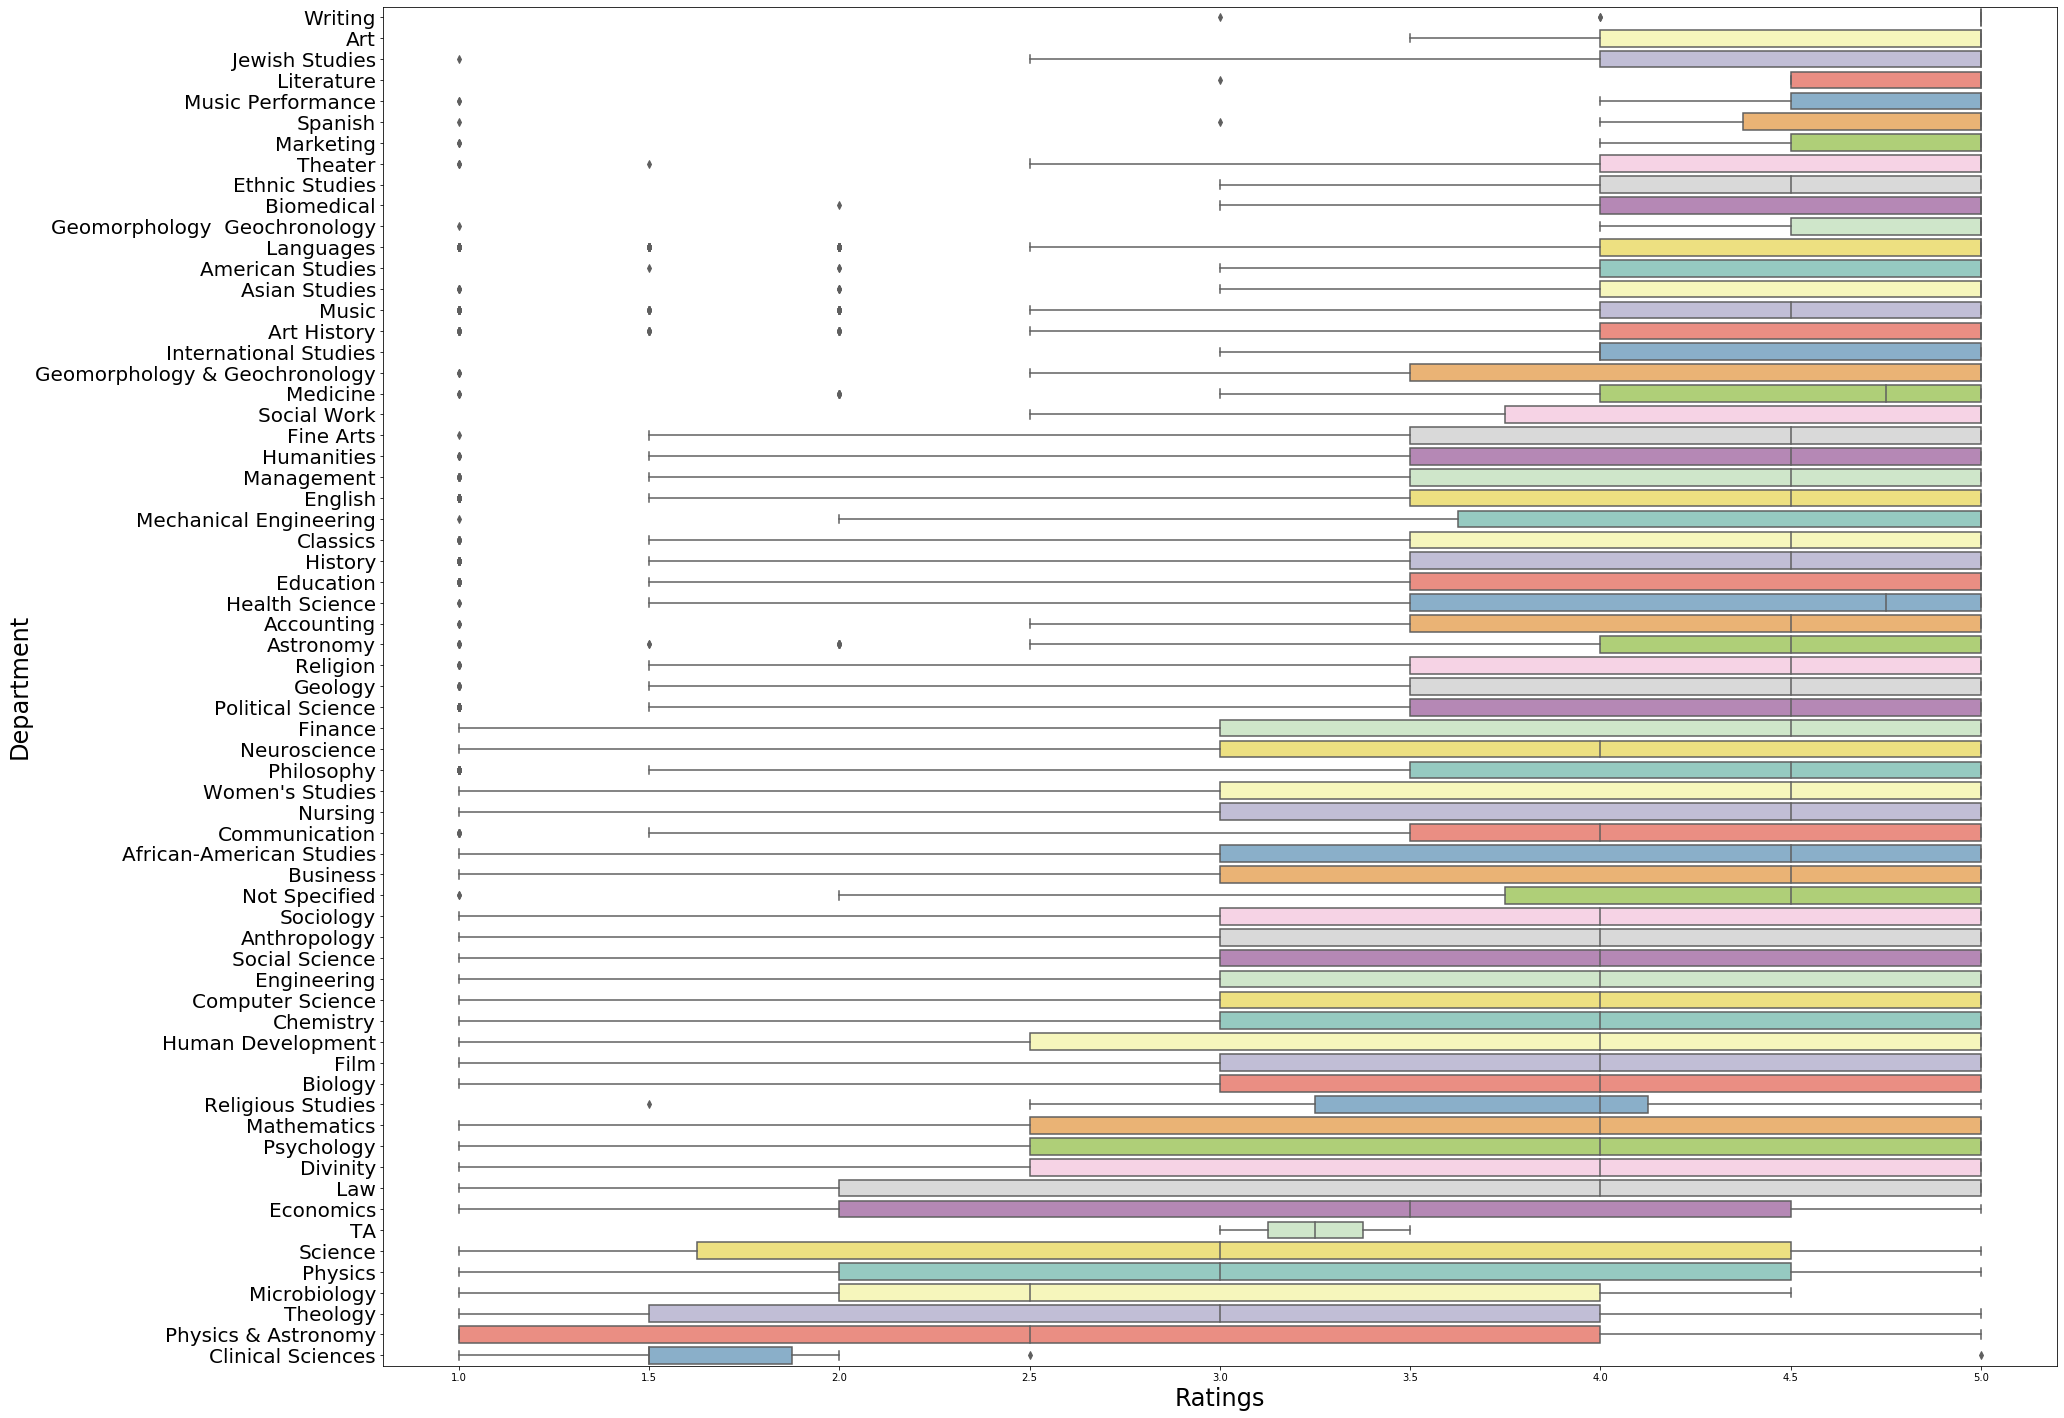

In [31]:
plt.figure(figsize=(30, 25))
ranking = ratings.groupby("tDept")["rOverall"].mean().sort_values(ascending=False).index
plot = sns.boxplot(y="tDept", x="rOverall", data=ratings, palette="Set3", order=ranking)
plot.set_yticklabels(plot.get_yticklabels(), fontsize=20);
plot.set_xlabel("Ratings", fontsize=24);
plot.set_ylabel("Department", fontsize=24);

# Tags

In [43]:
print("Proportion of non-empty tags: ", sum(ratings["teacherRatingTags"].str.len() > 2) / len(ratings))

Proportion of non-empty tags:  0.40700968744288063


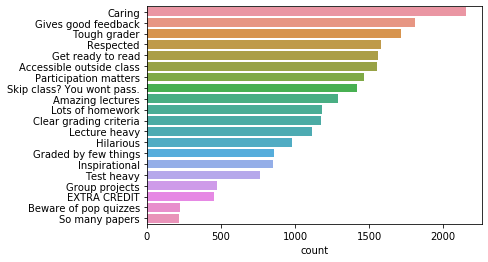

In [64]:
tags = sum(list(ratings["teacherRatingTags"].apply(lambda x: x.strip("[]").replace('"', '').replace("'", '').split(', '))), [])
tags = [item for item in filter(lambda x: x!='', tags)]
sns.countplot(y = tags, order=pd.value_counts(tags).index)

# Text

In [66]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

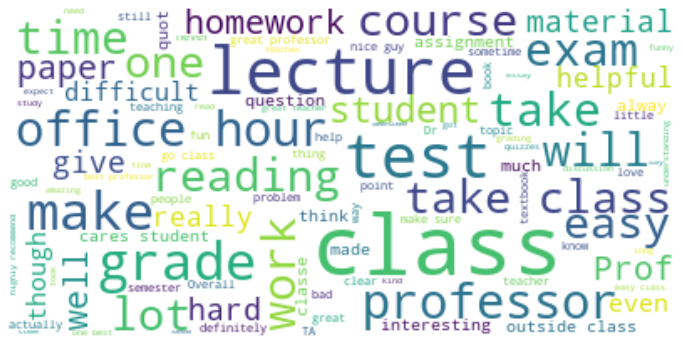

In [79]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(ratings.loc[ratings["rComments"].notnull(), "rComments"]))
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()